# LinUCB

## !! not working correct, needs inspection

UCB with Linear Hypotheses

Like all UCB methods, LinUCB always chooses the arm with highest UCB

In [4]:
import numpy as np 
import matplotlib.pyplot as plt


## Algorithm


In [367]:
class LinUCB:
    def __init__(self, alpha, song_features):
        self.d = song_features.shape[0] # number of songs
        self.K = song_features.shape[1] # length of feature vector
        self.alpha = alpha
        #self.song_features = song_features # d * K matrix showing features of songs
        self.song_features = song_features
        self.feature_weights = np.zeros(self.K) # update with ratings
        self.weighted_song_vectors = np.zeros((self.d, self.K)) # song_feature_vectors * feature_weights
        self.A = np.zeros((self.d, self.K, self.K))
        for i in range(self.d):
            self.A[i] = np.identity(self.K)
        self.b = np.zeros((self.d, self.K))
        self.theta_hat = np.zeros(self.K)
        self.choosen_song_index = 0 # random initial value
        self.p = np.zeros(self.d)
        self.norms = []
        self.ratings = []
        self.choices = []
        self.rewards = []
        self.epsilon = 0.2
    

    def recommend_song(self):
        #x = song_features[self.choosen_song_index]
        for a in range(self.d):
            x = song_features[a]
            #print(a)
            A_inv = np.linalg.inv(self.A[a])
            #print(A_inv.dot(self.b[a]))
            self.theta_hat = A_inv.dot(self.b[a])
            ta = x.dot(A_inv).dot(x)
            a_upper_ci = self.alpha * np.sqrt(ta)
            a_mean = self.theta_hat.dot(x)
            self.p[a] = a_mean + a_upper_ci
            #print(x.T.dot(np.linalg.inv(self.A).dot(x[a])))
        # update parameters
        #print(self.theta_hat)
        self.norms.append(np.linalg.norm(self.theta_hat - theta))
        self.p = self.p + (np.random.random(len(self.p)) * 0.00001)
        recommended_song = self.p.argmax()
        self.choices.append(recommended_song)
        self.choosen_song_index = recommended_song
        print(recommended_song)
        print(self.p)
        return recommended_song
    
    def feedback_for_song(self, rating):
        x = self.song_features[self.choosen_song_index]
        #rating = theta.dot(x) * 0.1
        print('rating')
        #print(rating)
        print(self.p)
        self.ratings.append(rating)
        self.A[song_index] += np.outer(x, x)
        self.b[self.p.argmax()] += rating * x
        #print(self.p)
        

## Test

In [331]:
num_songs = 5
num_feats = 4
alpha = 0.8
theta = np.array([0.1, 0.7, 0.2, 0.1])
s = 3

[0.1 0.7 0.2 0.1]


In [365]:
song_features = np.array([[2., 2., 0., 0.],
       [1., 0., 4., 3.],
       [1., 0., 0., 2.],
       [0., 0., 4., 0.],
       [0., 10., 0., 10.]])
test = LinUCB(num_songs,num_feats,alpha,song_features)
for i in range(20):
    recommendation = test.recommend_song()
    #print(test.theta_hat)
    test.feedback_for_song(recommendation, rating)

recommendation song index : 0
4
[ 2.26314906  4.0800043   1.78984863  3.20009904 11.31371871]
rating
[ 2.26314906  4.0800043   1.78984863  3.20009904 11.31371871]
4
[2.26355929 4.07929261 1.78890522 3.20093122 5.77404819]
rating
[2.26355929 4.07929261 1.78890522 3.20093122 5.77404819]
1
[2.26293089 4.07949017 1.78889998 3.20016089 3.55799316]
rating
[2.26293089 4.07949017 1.78889998 3.20016089 3.55799316]
4
[2.26320068 1.74849401 1.78982707 3.2007621  3.55830459]
rating
[2.26320068 1.74849401 1.78982707 3.2007621  3.55830459]
3
[2.26357968 1.7483417  1.78922478 3.20075705 2.79109804]
rating
[2.26357968 1.7483417  1.78922478 3.20075705 2.79109804]
4
[2.26358146 1.74863044 1.78955795 1.71763769 2.79184711]
rating
[2.26358146 1.74863044 1.78955795 1.71763769 2.79184711]
4
[2.26353053 1.74823668 1.78950444 1.71740745 2.3982103 ]
rating
[2.26353053 1.74823668 1.78950444 1.71740745 2.3982103 ]
0
[2.2631742  1.74808914 1.78947125 1.71742568 2.1560002 ]
rating
[2.2631742  1.74808914 1.78947125

In [359]:
test.recommend_song()

3
[2.26291681 3.01391249 1.7898095  3.20088287 0.79863993]


3

In [358]:
test.feedback_for_song(1, 0)

rating
0
[2.26302047 5.59996686 1.78943165 3.20007064 0.79840111]


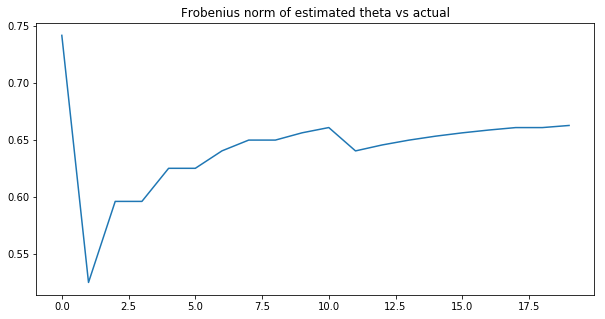

In [366]:
norms = test.norms
plt.figure(1,figsize=(10,5))
plt.plot(norms);
plt.title("Frobenius norm of estimated theta vs actual");

## Notes For Poster

lorem ipsum

## References

https://dl.acm.org/citation.cfm?id=1772758 (lin ucb base paper)

http://proceedings.mlr.press/v15/chu11a/chu11a.pdf (lin ucb algorithm)

https://github.com/Fengrui/LinearUCB-python/blob/master/policy_lin_ucb2.py (lin ucb implementation)

https://github.com/akhadangi/Multi-armed-Bandits/blob/master/Multi-armed%20Bandits.ipynb (lin ucb implementation)